# The Sign Convention and the Jones Calculus

**Scott Prahl**

*April 2020*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pypolar.jones as jones
import pypolar.visualization as vis

np.set_printoptions(suppress=True)  # to print 1e-16 as zero

## Introduction

This notebook explicitly states the conventions used in the `pypolar.jones` module.  Briefly, this module follows that used by Jones himself and a wide range of texts in the field of polarization and ellipsometry (Azzam, Collett, Goldstein, Kliger, Shurcliff, and Tompkins).  This convention differs from that used by Fowler and Wikipedia.

Shurcliff explains the situation in his book.

>In preparing this book the author faced a major problem as to conventions. The crux of the problem was the large number of branches of optics that must be brought into one consistent family. Traditionally, users of saccharimeters and other polarimeters employ a certain set of sign conventions, persons dealing with dichroism employ certain conventions, and similarly for persons dealing with crystallography, wave theory, the Stokes vector, the Poincare sphere, the Mueller calculus, and the Jones calculus. Ordinarily, the incompatibility of the various sets of conventions as to signs, handedness, etc., is unnoticed and unimportant. 

Obviously, then when testing/comparing the output of `pypolar` to the results found in texts, differences will arise due to conventions in

* wave function 
* point of view
* starting phase
* normalizations

Resources used or mentioned in this notebook.

* Jones, "A New Calculus for the Treatment of Optical Systems", *JOSA*, **38**, 681 (1948).

* Azzam, *Ellipsometry and Polarized Light*, 1977.
* Collett, *Field Guide to Polarization*, 2005.
* Fowles, *Introduction to Modern Optics*, 1975.
* Goldstein, *Polarized Light*, 2003.
* Kliger, *Polarized Light in Optics and Spectroscopy*, 1990
* Shurcliff, *Polarized Light Production and Use*, 1962.
* Tompkins, *Handbook of Ellipsometry*, 2005.

## The Jones vector

The electric field vector for plane-parallel light travelling in the $z$-direction is

$$
\mathbf{E}(x,y,z,t) = \mathbf{E}(z,t)
=
\begin{bmatrix}E_x(t)\\ E_y(t)\\ 0 \end{bmatrix}
=
\begin{bmatrix}E_{0x}e^{j(\omega t-kz+\phi_x)}\\ E_{0y}e^{j(\omega t - kz +\phi_y)}\\ 0\end{bmatrix}
=
\begin{bmatrix}E_{0x}e^{j\phi_x}\\ E_{0y}e^{j\phi_y}\\ 0 \end{bmatrix} e^{j(\omega t-kz)}.
$$

where the [spatial frequency](https://en.wikipedia.org/wiki/Spatial_frequency) $k$ and the [angular frequency](https://en.wikipedia.org/wiki/Angular_frequency) $\omega$ are related to the wavelength $\lambda$ and frequency $f$

$$
k = \frac{2\pi}{\lambda}
\qquad\mbox{and}\qquad
\omega = 2\pi f
$$

The electric field vector for this plane wave has

1. no dependence on $x$ or $y$
2. a spatial period of $\lambda$ in the $z$-direction
3. a temporal period of $f$ 

Furthermore, the vector component has
1. no electric field in the $z$ direction
2. a constant (complex) value in the $x$ and $y$ directions
3. fixed (real) field amplitudes $E_{0x}$ and $E_{0y}$
4. fixed (real) phases $\phi_x$ and $\phi_y$ 

This last requirement is means that there is a constant difference $\Delta=\phi_y-\phi_x$ that characterizes the plane wave.

[Jones](https://en.wikipedia.org/wiki/Robert_Clark_Jones) observed that such waves could conveniently be represented by a vector of two complex numbers (four real numbers)

$$
\begin{bmatrix}E_{0x}e^{j\phi_x}\\ E_{0y}e^{j\phi_y} \end{bmatrix}
$$

This is the **Jones vector** representation for a polarized plane wave and is adequate for the reconstruction of the entire plane wave.

### Wave function Convention

Sometimes the wave travelling in the $z$-direction has the form (used by Hecht, Fowles, Wikipedia)

$$
\mathbf{E}(z,t)
=
\begin{pmatrix}E_{0x}e^{j\phi_x'}\\ E_{0y}e^{j\phi_y'}\\ 0 \end{pmatrix} e^{j(kz-\omega t)}
$$

The Jones vectors for this wave function can be related to the ones given above by noting that
$$
(\omega t - kz+\phi) = -(kz-\omega t+\phi')
$$
and therefore $\phi'=-\phi$.

To account for this convention, make a call to `jones.set_pov_to_source(True)` before using any of the functions in the `jones` module.

### Point of View Convention

The electric field can be projected onto the $z = 0$ plane to simplify visualization of the field.  This is called a **sectional pattern**.  The point of view can be either

* from the source towards the receiver
* from the receiver towards the source

In optics, the point of view is usually towards the source and rightcircularly polarized light will trace a clockwise circle in the sectional pattern (shown below).  Notice also that when the animation is frozen, the spiral forms a right-handed screw.  In fact, Jones wrote

>In the writer's opinion the definition of right circularly polarized light is that an instantaneous picture of the space distribution of its electric vector represents a right spiral.

In [2]:
# example using default sign convention

v = jones.field_right_circular()
print("Jones vector for right circularly polarized light")
print(v)
print('preparing frames for animation...')
vis.draw_jones_animated(v,nframes=32)

Jones vector for right circularly polarized light
[0.70710678+0.j         0.        +0.70710678j]
preparing frames for animation...


In [10]:
# example using alternate sign convention
jones.use_alternate_convention(True)

v = jones.field_right_circular()
print("Jones vector for right circularly polarized light")
print(v)
print('preparing frames for animation...')
ani = vis.draw_jones_animated(v,nframes=32)

# revert so later calculations use the default
jones.use_alternate_convention(False) 

ani

Jones vector for right circularly polarized light
[0.70710678-0.j         0.        -0.70710678j]
preparing frames for animation...


If the point of view was from the source looking towards the receiver, the direction of rotation would be counter-clockwise in the example above.

So how does this affect the phase? Well when the point of view is flipped, the $x$-axis flips.  Consequently, since phase angles are still measured from the $x$-axis, the phase angle will change sign.

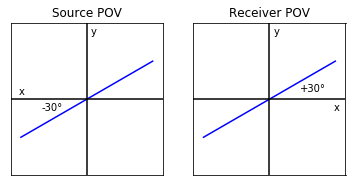

In [3]:
def pov_drawing():
    theta = np.radians(30)
    c = np.cos(theta)
    s = np.sin(theta)
    plt.plot([-c,c],[-s,s],color='blue')
    plt.text(0.05,0.85,"y")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xticks([])
    plt.yticks([])
    plt.axhline(0,color='black')
    plt.axvline(0,color='black')
    
plt.subplots(1,2)
plt.subplot(1,2,1, aspect=1)
pov_drawing()
plt.title("Source POV")
plt.text(-0.9,0.05,"x")
plt.text(-0.6,-0.15,"-30°")

plt.subplot(1,2,2, aspect=1)
pov_drawing()
plt.text(0.85,-0.15,"x")
plt.title("Receiver POV")
plt.text(0.4,0.1,"+30°")
plt.show()

### Starting Phase Convention

The starting phase of an optical field is arbitrary.  Kliger writes:

> The reader should be aware that "standard" vectors are often expressed in different forms by different authors (or even by the same author in different instances). Usually, the form chosen is dictated simply by the context of the problem. As long as two vectors are interconvertible by multiplication of one of the vectors by a complex exponential factor, the two are equivalent (except in terms of absolute phase) and either one can be used in the matrix calculations described in the following sections. 

Therefore the following expressions for Jones vectors describe equivalent polarization states

$$
\begin{bmatrix}E_{0x}e^{j\phi_x}\\ E_{0y}e^{j\phi_y} \end{bmatrix},\qquad
\begin{bmatrix}E_{0x}\\ E_{0y}e^{j\Delta} \end{bmatrix},\qquad
\begin{bmatrix}E_{0x}e^{-j\Delta/2}\\ E_{0y}e^{+j\Delta/2} \end{bmatrix}
$$

where $\Delta=\phi_y-\phi_x$

### Normalization Convention

Often Jones vectors are normalized so that the vector magnitude is unity

$$
E_{0x}^2 + E_{0y}^2 = 1
$$

A normalized Jones vectors would be

$$
\textbf{J}_\mathrm{norm} = \frac{1}{\sqrt{E_{0x}^2+E_{0y}^2}}
\begin{bmatrix}E_{0x}e^{j\phi_x}\\ E_{0y}e^{j\phi_y} \end{bmatrix}
$$

this is usually accompanied by a shift in the starting phase so the $x$ or $y$ component of the Jones vector is a real number

$$
\frac{1}{\sqrt{E_{0x}^2+E_{0y}^2}}
\begin{bmatrix}E_{0x}e^{j\Delta}\\ E_{0y}\end{bmatrix},\qquad
\frac{1}{\sqrt{E_{0x}^2+E_{0y}^2}}
\begin{bmatrix}E_{0x}\\ E_{0y}e^{-j\Delta}\end{bmatrix},
$$

Finally, a normalized, shifted Jones vector can be constructed for a single complex number $\chi$ by

$$
\frac{1}{\sqrt{1+\chi\chi^*}}
\begin{bmatrix}1\\ \chi\end{bmatrix}
$$

where $\chi$ is the complex polarization parameter,

$$
\chi = \frac{E_y}{E_x}
$$
